# Assignment 01: Sales Data Analysis – Programming Problem

## 1) Imports

In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## 2) Load the sales data into a pandas DataFrame (Task a)

In [33]:
df = pd.read_csv("./data/sales_data.csv", delimiter=';')

df.shape, df.columns

((2810, 7),
 Index(['OrderID', 'ProductCode', 'QuantityOrdered', 'PriceEach', 'OrderDate',
        'City', 'Country'],
       dtype='object'))

## 3) Display the first 5 rows (Task b)

In [34]:
df.head()

,OrderID,ProductCode,QuantityOrdered,PriceEach,OrderDate,City,Country
0,10145,S10_1678,45,83.26,8/25/2003 0:00,Pasadena,USA
1,10159,S10_1678,49,100,10.10.03 00:00,San Francisco,USA
2,10168,S10_1678,36,96.66,10/28/2003 0:00,Burlingame,USA
3,10180,S10_1678,29,86.13,11.11.03 00:00,Lille,France
4,10188,S10_1678,48,100,11/18/2003 0:00,Bergen,Norway


## 4) Check for missing values (Task c)

In [35]:
missing_counts = df.isna().sum()  # or df.isnull().sum()
missing_counts

OrderID            0
ProductCode        0
QuantityOrdered    0
PriceEach          0
OrderDate          0
City               0
Country            0
dtype: int64

## 5) Ensure numeric types for calculations (helper)

In [36]:
# Convert columns to numeric if they were read as strings (coerce invalid values to NaN)
df["QuantityOrdered"] = pd.to_numeric(df["QuantityOrdered"], errors="coerce")
df["PriceEach"] = pd.to_numeric(df["PriceEach"], errors="coerce")

# Re-check missing values after conversion
df[["QuantityOrdered","PriceEach"]].isna().sum()

QuantityOrdered    0
PriceEach          4
dtype: int64

## 6) Add `TotalSales` = `QuantityOrdered` × `PriceEach` (Task d)

In [37]:
df["TotalSales"] = df["QuantityOrdered"] * df["PriceEach"]
df[["OrderID","ProductCode","QuantityOrdered","PriceEach","TotalSales"]].head()

,OrderID,ProductCode,QuantityOrdered,PriceEach,TotalSales
0,10145,S10_1678,45,83.26,3746.70
1,10159,S10_1678,49,100.00,4900.00
2,10168,S10_1678,36,96.66,3479.76
3,10180,S10_1678,29,86.13,2497.77
4,10188,S10_1678,48,100.00,4800.00


## 7) Total sales across all orders (Task e)

In [38]:
total_sales_all_orders = df["TotalSales"].sum()
total_sales_all_orders

np.float64(8247653.279999999)

## 8) Product that generated the highest total sales (Task f)

In [39]:
top_product = df.groupby("ProductCode")["TotalSales"].sum()
top_product.idxmax()

'S18_3232'

## 9) Average sales per order (Task g)

In [40]:
average_sales_per_order = df.groupby("OrderID")["TotalSales"].sum().mean()
average_sales_per_order

np.float64(27041.486163934427)

## 10) City with the highest number of unique orders (Task h)

In [41]:
unique_orders_per_city = df.groupby("City")["OrderID"].nunique()

top_city = unique_orders_per_city.idxmax()
top_city_unique_orders = unique_orders_per_city.loc[top_city]

top_city, int(top_city_unique_orders)

('Madrid', 31)

## 11) Bar chart: total sales per city (Task i)

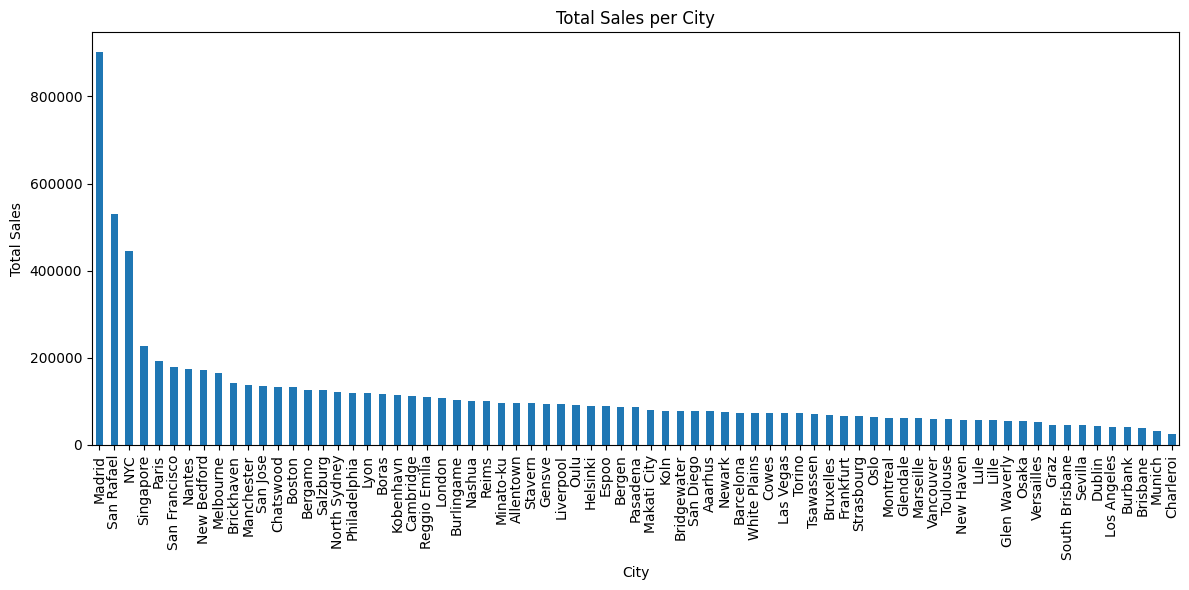

In [42]:
sales_per_city = df.groupby("City", as_index=True)["TotalSales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sales_per_city.plot(kind="bar")
plt.title("Total Sales per City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

## 12) Save the modified dataframe (Task j)

In [43]:
OUTPUT_CSV = "./data/modified_sales_data.csv"
df.to_csv(OUTPUT_CSV, index=False)
OUTPUT_CSV

'./data/modified_sales_data.csv'

## 13) Final Answers (as requested in the assignment)

In [44]:
print(f"(a) Total sales across all orders: {total_sales_all_orders}")
print(f"(b) ProductCode with the highest total sales: {top_product_code}")
print(f"(c) Average sales per order: {average_sales_per_order}")
print(f"(d) City with the highest number of orders: {top_city}")
print(f"(e) Unique orders from that city: {int(top_city_unique_orders)}")

(a) Total sales across all orders: 8247653.279999999
(b) ProductCode with the highest total sales: S18_3232
(c) Average sales per order: 27041.486163934427
(d) City with the highest number of orders: Madrid
(e) Unique orders from that city: 31
